# 🌟 2. What are 1st, 2nd, and 3rd Order Filters?

## 🎯 1st Order Filter
- **Only 1 delay:** depends on $x[n-1]$

**Equation:**

$y[n]=b_0x[n]+b_1x[n-1]-a_1y[n-1]$

- **Simplest filter:** low-pass, high-pass, smoothing, etc.

- **Example:** Moving Average Filter.

🧠 Order = highest delay (1 delay).

## 🎯 2nd Order Filter
- **2 delays:** depends on 

- **Equation:**

$y[n]=b_0x[n]+b_1x[n-1]+b_2x[n-2]-a_1y[n-1]-a_2y[n-2]$

- **More powerful** than 1st order.

- Can create **resonance, notch filters**, better lowpass/highpass.

- **🧠 Order = 2** because maximum delay is


## 🎯 3rd Order Filter

- **3 delays:** depends on 

- **Equation:**

$y[n]=b_0x[n]+b_1x[n-2]+b_3x[n-3]-a_1y[n-1]-a_2y[n-2]-a_3y[n-3]$

- **Even sharper filters.**

- Can separate frequency bands better.

- **🧠 Order = 3** because of delay up to

### 🔥 In one line:

| Filter Type | Max Delay | Complexity | Use |
|:-----------|:----------|:------------|:----|
| 1st Order  | 1 step back | Simple     | smoothing, lowpass |
| 2nd Order  | 2 steps back | Medium    | bass boost, resonance |
| 3rd Order  | 3 steps back | Advanced  | sharper filters, audio |

## 🎯 What are Filter Coefficients?

Filter coefficients are just **numbers** that control how the filter behaves.

They decide:

- How much to **keep the current input**

- How much to **keep the past inputs (memory)**

- How much to **subtract or add from past outputs**

These numbers are called:

- **b-coefficients** → for **inputs** (feedforward)

- **a-coefficients** → for **outputs** (feedback)

In formula terms, a digital filter equation looks like:

$y[n]=b_0x[n]+b_1x[n-1]+...-a_1y[n-1]-a_2y[n-2]$

## Frequency Response of 1st, 2nd and 3rd Order Filters:

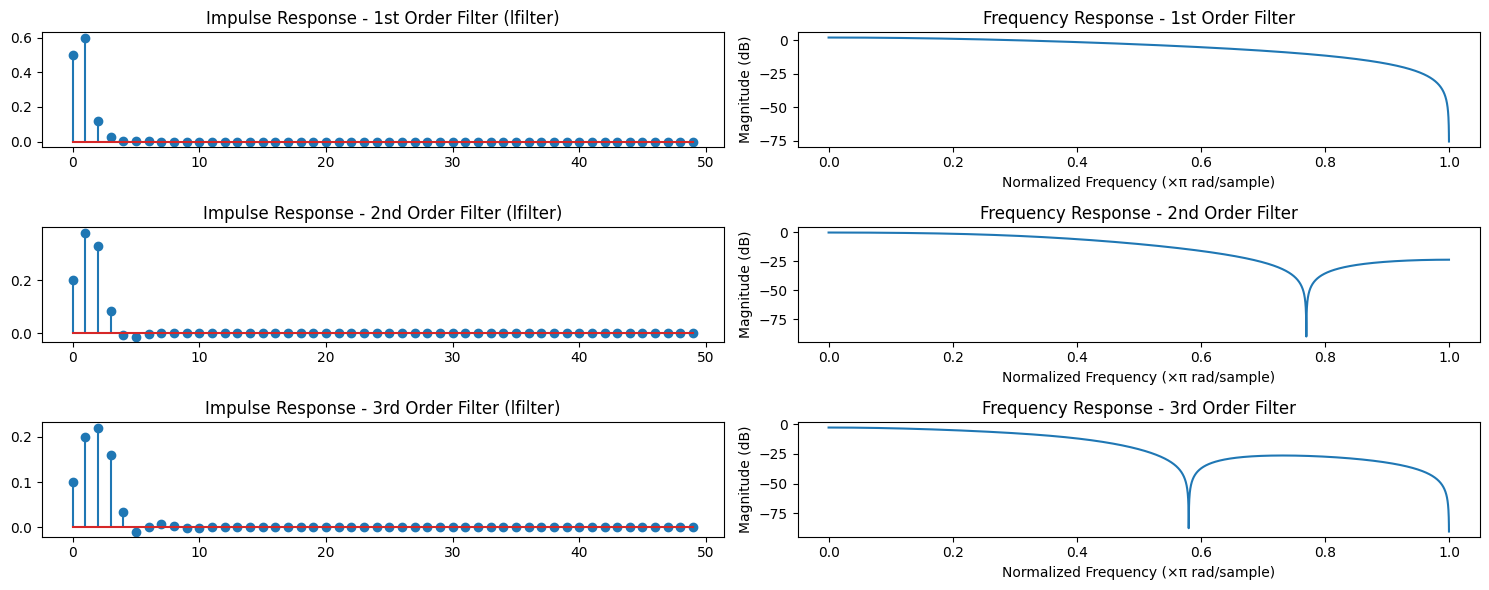

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, freqz

# Define impulse input
N = 50  # Number of samples
x = np.zeros(N)
x[0] = 1  # Delta (impulse) input

# Define filter coefficients
b1 = [0.5, 0.5]
a1 = [1, -0.2]

b2 = [0.2, 0.3, 0.2]
a2 = [1, -0.4, 0.12]

b3 = [0.1, 0.15, 0.15, 0.1]
a3 = [1, -0.5, 0.3, -0.1]

# Apply filters using lfilter
y1 = lfilter(b1, a1, x)
y2 = lfilter(b2, a2, x)
y3 = lfilter(b3, a3, x)

# Plot impulse responses
plt.figure(figsize=(15,6))

plt.subplot(3,2,1)
plt.stem(y1)
plt.title('Impulse Response - 1st Order Filter (lfilter)')

plt.subplot(3,2,3)
plt.stem(y2)
plt.title('Impulse Response - 2nd Order Filter (lfilter)')

plt.subplot(3,2,5)
plt.stem(y3)
plt.title('Impulse Response - 3rd Order Filter (lfilter)')

# Plot Frequency Responses
w1, h1 = freqz(b1, a1, worN=8000)
w2, h2 = freqz(b2, a2, worN=8000)
w3, h3 = freqz(b3, a3, worN=8000)

plt.subplot(3,2,2)
plt.plot(w1/np.pi, 20*np.log10(np.abs(h1)))
plt.title('Frequency Response - 1st Order Filter')
plt.xlabel('Normalized Frequency (×π rad/sample)')
plt.ylabel('Magnitude (dB)')

plt.subplot(3,2,4)
plt.plot(w2/np.pi, 20*np.log10(np.abs(h2)))
plt.title('Frequency Response - 2nd Order Filter')
plt.xlabel('Normalized Frequency (×π rad/sample)')
plt.ylabel('Magnitude (dB)')

plt.subplot(3,2,6)
plt.plot(w3/np.pi, 20*np.log10(np.abs(h3)))
plt.title('Frequency Response - 3rd Order Filter')
plt.xlabel('Normalized Frequency (×π rad/sample)')
plt.ylabel('Magnitude (dB)')

plt.tight_layout()
plt.show()


## Magnitude Response of 1st, 2nd and 3rd Order Filter

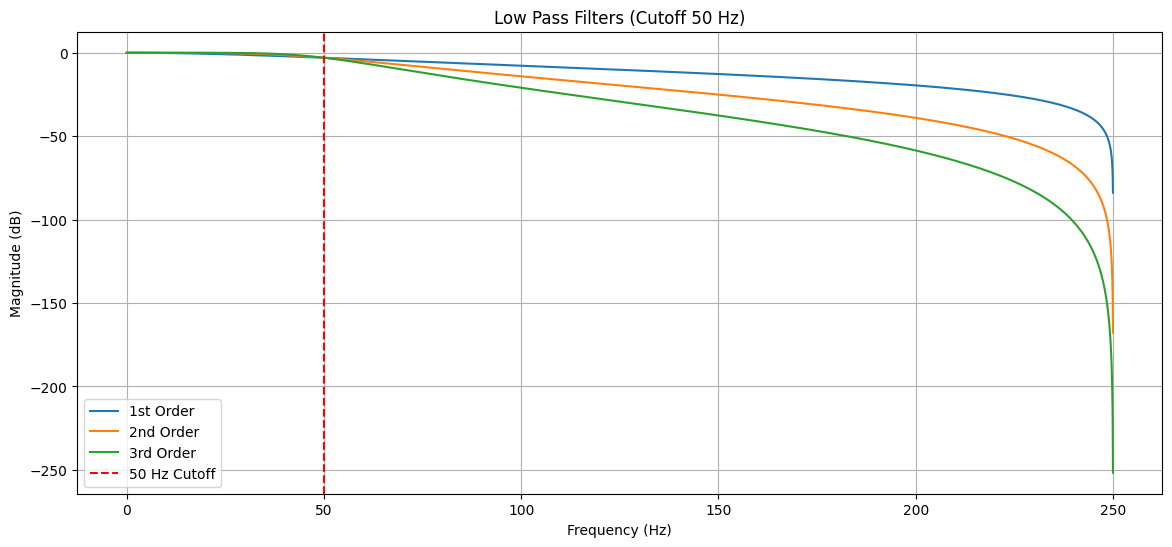

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, freqz, lfilter

# Settings
Fs = 500  # Sampling frequency (Hz)
Fc = 50   # Cutoff frequency (Hz)

# Normalized cutoff frequency
Wn = Fc / (Fs/2)  # Because digital frequencies go from 0 to 1 (1 = Fs/2)

# Design Butterworth filters
b1, a1 = butter(1, Wn, btype='low')
b2, a2 = butter(2, Wn, btype='low')
b3, a3 = butter(3, Wn, btype='low')

# Frequency response
w1, h1 = freqz(b1, a1, worN=8000)
w2, h2 = freqz(b2, a2, worN=8000)
w3, h3 = freqz(b3, a3, worN=8000)

# Plot
plt.figure(figsize=(14,6))
plt.plot(w1*Fs/(2*np.pi), 20*np.log10(abs(h1)), label='1st Order')
plt.plot(w2*Fs/(2*np.pi), 20*np.log10(abs(h2)), label='2nd Order')
plt.plot(w3*Fs/(2*np.pi), 20*np.log10(abs(h3)), label='3rd Order')

plt.title('Low Pass Filters (Cutoff 50 Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid()
plt.axvline(50, color='red', linestyle='--', label='50 Hz Cutoff')
plt.legend()
plt.show()


## Implementing Moving Average Filter (1st Order Filter)

A **moving average filter** is a simple and effective linear filter often used to smooth data by averaging a sliding window of values. The filter coefficients for a moving average filter of length 
**N** are given by:

$h[n]=\frac{1}{N}, for\ n=0,1,2,..,N-1$

This means that for a moving average filter with a window size of **𝑁**, the coefficient for each point in the window is **N** samples.

**Example:**

For a moving average filter with a window size of **N=5**, the filter coefficients would be:

$$h[n]=[\frac{1}{5}, \frac{1}{5}, \frac{1}{5}, \frac{1}{5}, \frac{1}{5}]$$

The output **$y[n]$** of the moving average filter is given by convoltion of input $x[n]$ with filter coefficients **$h[n]:$**

$$y[n]=\sum{h[k].x[n-k]}$$

for k from 0 to N-1

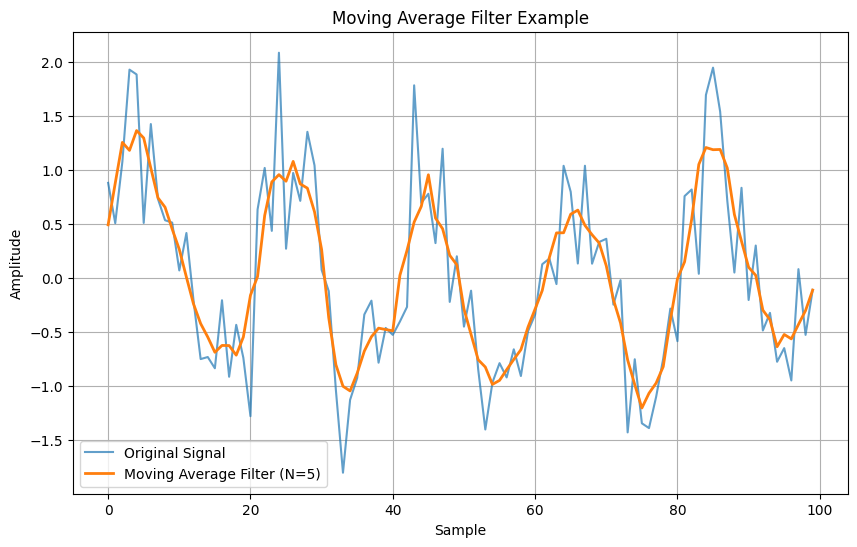

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def moving_average_filter(x, N):
    # Create the filter coefficients
    h = np.ones(N) / N
    # Apply convolution to the input signal with the filter coefficients
    y = np.convolve(x, h, mode='same')
    return y

# Generate a noisy signal for demonstration
np.random.seed(0)
x = np.sin(2 * np.pi * 0.05 * np.arange(0, 100)) + 0.5 * np.random.randn(100)

# Apply the moving average filter with a window size of 5
N = 5
y = moving_average_filter(x, N)

# Plot the original signal and the filtered signal
plt.figure(figsize=(10, 6))
plt.plot(x, label='Original Signal', alpha=0.7)
plt.plot(y, label=f'Moving Average Filter (N={N})', linewidth=2)
plt.legend()
plt.title('Moving Average Filter Example')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()